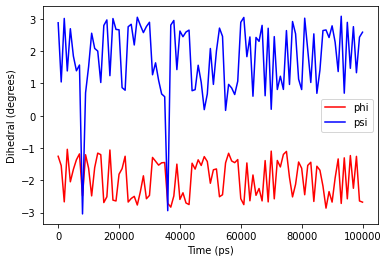

In [1]:
#Import modules

import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

#Read in the data from the COLVAR_A file
data = np.loadtxt('COLVAR_A')

#plot phi and psi dihedrals for every 1000 steps over time with colors and labels
plt.plot(data[::1000,0], data[::1000,1], 'r', label='phi')
plt.plot(data[::1000,0], data[::1000,2], 'b', label='psi')
plt.xlabel('Time (ps)')
plt.ylabel('Dihedral (degrees)')
plt.legend()
plt.show()

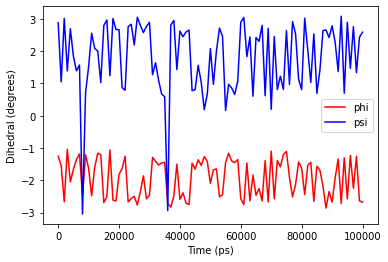

In [2]:
#Use mdtraj to compute the phi and psi dihedrals from traj_comp.xtc
traj = md.load('traj_comp.xtc', top='confout.gro')
phi, psi = md.compute_phi(traj), md.compute_psi(traj)

#plot dihedrals over COLVAR_A over time
plt.plot(data[::1000,0], phi[1][::1000,0], 'r', label='phi')
plt.plot(data[::1000,0], psi[1][::1000,0], 'b', label='psi')
plt.xlabel('Time (ps)')
plt.ylabel('Dihedral (degrees)')
plt.legend()
plt.show()

In [4]:
print("Std_Dev_phi_COLVAR_A =", np.std(phi[1]))
print("Std_Dev_psi_COLVAR_A =", np.std(psi[1]))

Std_Dev_phi_COLVAR_A = 0.5538316
Std_Dev_psi_COLVAR_A = 1.024898


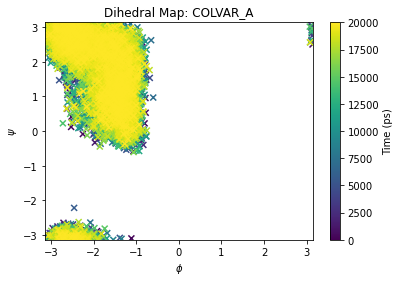

In [7]:
# ramachandran plot using traj_A
psi_indices, phi_indices = [4, 6, 8, 14], [6, 8, 14, 16]
angles = md.compute_dihedrals(traj, [phi_indices, psi_indices])

from pylab import *
from math import pi

figure()
title('Dihedral Map: COLVAR_A')
scatter(angles[:, 1], angles[:, 0], marker='x', c=traj.time)
cbar = colorbar()
cbar.set_label('Time (ps)')
xlabel(r'$\phi$')
ylabel(r'$\psi$')
xlim(-pi, pi)
ylim(-pi, pi)
show()